# Simulated experiments to estimate p-values (for the special case where we are interested in the probability to get more than expected)

An attempt to get an intuitive feel for p-values. These examples are only for cases where we count the number of fluctuations above a certain threshold, you might also be interested in those below - why not add this to the programme.

You can either run this in binder
https://mybinder.org/v2/gh/JonasRademacker/JupyterNotebooksForTeachingMath/master?filepath=BinomiPoissonGauss.ipynb , 

or - much, much better, although a bit hasslesome the first time you set it up - you can run it on your own computer. To do that:

1) Download and install anaconda (https://www.anaconda.com/). 

2) Download this file from github. Do so by clicking on "Raw", and then asking your browser to save the file (in Firefox: File -> Save Pages As...)

Alternatively, you can download the entire github repository. Open a terminal window. Go to the directory where you want a copy of this github repository to live on your computer. Then execute the command:

git clone https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath.git

(alternatively, go to https://github.com/JonasRademacker/JupyterNotebooksForTeachingMath and find the green "Code" button and take it from there)

3) Open a terminal window, go to the directory where this file is, and type: jupyter notebook

This file should now open in your browser (again), and you can edit it and execute and save the code.

Remember, to excecute each field, do shift+return. Execute the fields in order. If things got messy, go to Kernel and select Restart and Clear all output - and start Shift+Return from the top.

# What are we doing here?
We are generating simulated experiments, where each experiment gives a random result drawn from a probability distribution. Then we count how often the results are above a certain threshold. This number, divided by the total number of experiments, in the limit of infinitely many experiments, is the p-value. Here we do this for binomial, Poisson and Gaussian.

First import some libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Before we start, let's initialise the random number generator. Change the seed to get different outcomes for (peudo)random numbers used in this sheet.

In [2]:
np.random.seed(650)

Let's generate random numbers according to each of these distributions. It's not really necessary to wrap these fully functional numpy functions into my own functions, but I'll do it anyway, in the hope it will add clarity

In [3]:
def binomial(NumTries, p_success, howoften=1):
    return np.random.binomial(NumTries, p_success, howoften)

def Poisson(mean, howoften=1):
    return np.random.poisson(mean, howoften)

def Gauss(mean, sigma, howoften=1):
    return np.random.normal(mean, sigma, howoften)

print(binomial(10, 0.5), Poisson(5), Gauss(5, sqrt(5)))

[7] [6] [4.06763569]


Let's fill histograms with them:

In [4]:
def MakeAndPlotBinomi(NumTries, p_success, numExperiments, threshold):
    binomiArray  = binomial(NumTries, p_success, numExperiments)
    mean = NumTries*p_success
    sigma=sqrt(NumTries*p_success*(1.0-p_success))
    
    r=(mean - 4*sigma, mean + 4*sigma)
    nbins = int(r[1]-r[0])//10+1
    if NumTries < 1000:
        nbins=NumTries + 1
        r=(0, nbins)

    hb=plt.hist(binomiArray,  nbins, range=r, linewidth=2, histtype='step', color='r')
    plt.plot((threshold, threshold), (0, hb[0].max()*1.02), linewidth=2, color='orange')
    plt.show()
    print(numExperiments, "random numbers according to Binomial",
          "\nfor N=", NumTries, "p=", p_success)
    
    above = np.count_nonzero(binomiArray >= threshold)
    print("In these", numExperiments,  "simulated experiments, there were"
         , above
         , "results >=", threshold, "."
         , "\n This corresponds to a p-value of approximately <fill in the gap> "
         , "\n Note that this is subject to statistical fluctations -"
         , "\n run this code again and the number will change."
         , "\n Run the code with a larger numExperiments to reduce the uncertainty on the p-value."
         , "\n BTW: you can calculate that uncertainty - what is it?")


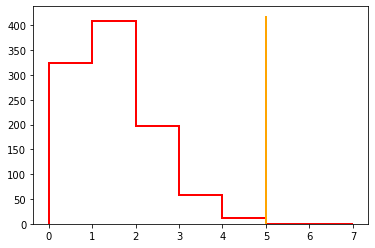

1000 random numbers according to Binomial 
for N= 6 p= 0.16666666666666666


NameError: name 'numExperiment' is not defined

In [5]:
MakeAndPlotBinomi(6, 1/6, 1000, threshold=5)

In [ ]:
def MakeAndPlotPoisson(mean, numExperiments, threshold):
    PoissonArray = Poisson (mean, numExperiments)
    sigma=sqrt(mean)
    
    r=(mean - 4*sigma, mean + 4*sigma)
    nbins = int(r[1]-r[0])//10+1
    if mean < 50:
        nbins = int(mean + 4*sigma)+1
        r=(0, nbins)

    hp=plt.hist(PoissonArray, nbins, range=r, linewidth=2, histtype='step', color='b')
    plt.plot((threshold, threshold), (0, hp[0].max()*1.02), linewidth=2, color='orange')
    plt.show()

    print(numExperiments, "random numbers according to Poisson (blue)",
          "\nfor lambda =", mean)
    
    above = np.count_nonzero(PoissonArray >= threshold)
    print("In these", numExperiments,  "simulated experiments, there were"
         , above
         , "results >=", threshold, "."
         , "\n This corresponds to a p-value of approximately <fill in the gap> "
         , "\n Note that this is subject to statistical fluctations -"
         , "\n run this code again and the number will change."
         , "\n Run the code with a larger numExperiments to reduce the uncertainty on the p-value."
         , "\n BTW: you can calculate that uncertainty - what is it?")


In [ ]:
MakeAndPlotPoisson(1, 1000, 2)

In [ ]:
def MakeAndPlotGauss(mean, sigma, numExperiments, threshold):
    GaussArray   = Gauss(mean, sigma, numExperiments)
    
    r=(mean - 4*sigma, mean + 4*sigma)
    nbins = numExperiments//50
    if nbins < 5: nbins=5
    if nbins > 100: nbins=100

    hg=plt.hist(GaussArray,   nbins, range=r, linewidth=2, histtype='step', color='g')
    plt.plot((threshold, threshold), (0, hg[0].max()*1.02), linewidth=2, color='orange')
    plt.show()
    above = np.count_nonzero(GaussArray >= threshold)
    print("In these", numExperiments,  "simulated experiments, there were"
         , above
         , "results >=", threshold, "."
         , "\n This corresponds to a p-value of approximately <fill in the gap> "
         , "\n Note that this is subject to statistical fluctations -"
         , "\n run this code again and the number will change."
         , "\n Run the code with a larger numExperiments to reduce the uncertainty on the p-value."
         , "\n BTW: you can calculate that uncertainty - what is it?")
    

In [ ]:
MakeAndPlotGauss(1, 1, 10000, 2)

# Use with caution!

The code above is not suitable for calculating exact p-values, due to the statistical fluctuations inherent in this approach. However, if you generate LOADS of experiments, these fluctuations will become less and less relevant. This "Monte-Carlo" approach is frequently used for random variables for which we do not know the analytic expression but we know how to generate random events (this is often much easier, for example when you simulate the response of a complicated detector). You might find the code above useful for your own simulated datasets.
For Gaussian, Poisson and binomial, you can calculate the p-values analytically. (But this simulation illustrates, hopefully, what they mean.)

As you will have noticed, these examples are only for cases where we count the number of fluctuations above a certain threshold, you might also be interested in those below - why not add this feature to the programme.